In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import timedelta

from scipy.optimize import curve_fit
from scipy.stats import multivariate_normal

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

##### Часть I
###### 1.
Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!

Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

Прокурор оценил вероятность $P(A)$ что у подсудимого редкая группа крови, найденая на месте убиства. 
А, надо было оценить $P(B|A)$ вероятность, что подозреваемый - убийца, при условии, что у подозреваемого редкая группа крови.
Вспомним теорему Байеса.

$P(B|A) = \frac{P(B) P(A| B)}{P(A)} =
\frac{P(B) P(A| B)}{P(A|B)P(B) + P(A|\overline{B})P(\overline{B})}$

$P(A|B) = 1$ - вероятность, что если подсудимый виновен - у него редкая группа крови

$P(A|\overline{B}) = 0.01$ - вероятность, если подсудимый невиновен, у него редкая группа крови

$P(B|A_k, A_s) =
\frac{P(B) P(A|B)}{P(A|B)P(B) + P(A|\overline{B})P(\overline{B})} =
\frac{P(B)}{P(B) + 0.01 \cdot (1-P(B))} = 
\frac{P(B)}{0.99 \cdot P(B) + 0.01}
$

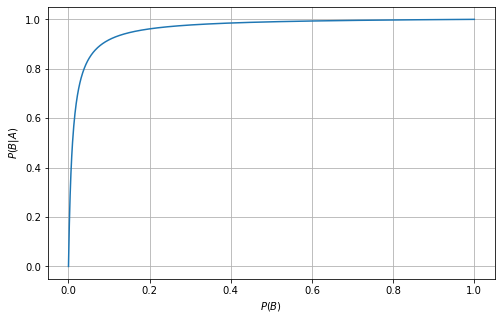

0.9900990099009901


In [4]:
def p(prob):
    return prob / (0.99 * prob + 0.01)
    
prob = np.linspace(0, 1, 1000)
plt.figure(figsize=(8, 5))
plt.plot(prob, p(prob))
plt.grid()
plt.xlabel('$P(B)$')
plt.ylabel('$P(B|A)$')
plt.show()
print(p(0.5))

Для обвинения подсудимого, нужны другие доказательства кроме его группы крови.
Например, если есть доказательства кроме группы крови, что подсудимый виновен с вероятностью $P(B) = 0.5$, то вероятность его вины с учетом группы крови - 99%. 

Если же все доказательства свидетельствуют против виновности $P(B) = 0$, то считать подозреваемого виновным неверно.

##### 2.
Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

Адвокат оценил вероятность виновности случайно выбранного человека из города с населением 1 млн с редкой группой крови. Т.е. при априорной вероятности $P(B) = \frac{1}{1000000}$ Эта веротяность действительно равна 0.01%. Но исключать группу крови из материалов дела нельзя. Как было замечено ранее, если другие доказателства будут говорить, что вероятность невиновности подсудимого - 95%, а виновности - только 5%, то знания о группе крови могут дать нам уже 84% вероятности виновности подсудимого.

##### 3.

Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

$P(болезнь = 1|тест = 1) = \frac{P(болезнь = 1) P(тест = 1|болезнь = 1)}{P(тест = 1)} = 
\frac{P(болезнь = 1) P(тест = 1|болезнь = 1)}{P(тест = 1|болезнь = 0)P(болезнь = 0) + P(тест = 1|болезнь = 1)P(болезнь = 1)}
$

$P(болезнь = 1|тест = 0) = \frac{P(болезнь = 1) P(тест = 0|болезнь = 1)}{P(тест = 0)} = 
\frac{P(болезнь = 1) P(тест=0|болезнь = 1)}{P(тест=0|болезнь = 0)P(болезнь = 0) + P(тест = 0|болезнь = 1)P(болезнь = 1)}
$

In [10]:
def p_test(fpr=0.05, fnr=0.05, p_sickness=0.01, test_positive=True):
    if test_positive:
        return p_sickness * (1 - fnr) / (fpr * (1 - p_sickness) + (1 - fnr) * p_sickness)
    else:
        return p_sickness * fnr / ((1 - fpr) * (1 - p_sickness) + fnr * p_sickness)
    
p_test()

0.16101694915254236

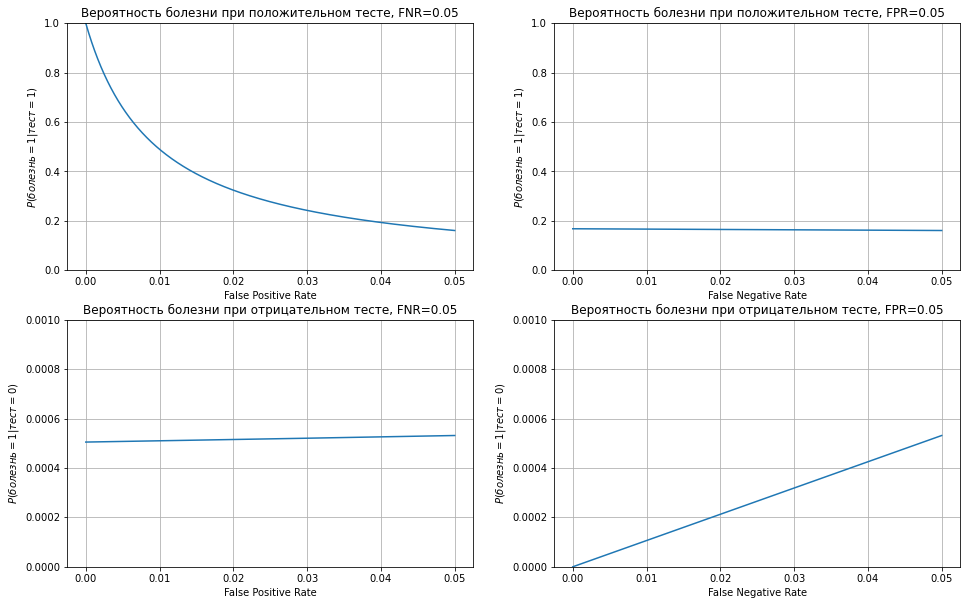

In [15]:
fpr = np.linspace(0, 0.05, 1000)
fnr = np.linspace(0, 0.05, 1000)

y_lim_positive_test = (0, 1)
y_lim_negative_test = (0, 0.001)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

ax1.plot(fpr, p_test(fpr=fpr, test_positive=True))
ax1.set_ylim(y_lim_positive_test)        
ax1.set_title('Вероятность болезни при положительном тесте, FNR=0.05')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('$P(болезнь=1|тест=1)$')
ax1.grid()

ax2.plot(fnr, p_test(fnr=fnr, test_positive=True))
ax2.set_ylim(y_lim_positive_test)                                             
ax2.set_title('Вероятность болезни при положительном тесте, FPR=0.05')
ax2.set_xlabel('False Negative Rate')
ax2.set_ylabel('$P(болезнь=1|тест=1)$')
ax2.grid()

ax3.plot(fpr, p_test(fpr=fpr, test_positive=False))
ax3.set_ylim(y_lim_negative_test)
ax3.set_title('Вероятность болезни при отрицательном тесте, FNR=0.05')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('$P(болезнь=1|тест=0)$')
ax3.grid()

ax4.plot(fnr, p_test(fnr=fnr, test_positive=False))
ax4.set_ylim(y_lim_negative_test)
ax4.set_title('Вероятность болезни при отрицательном тесте, FPR=0.05')
ax4.set_xlabel('False Negative Rate')
ax4.set_ylabel('$P(болезнь=1|тест=0)$')
ax4.grid()

Допустим, мы можем снизить FPR или FNR в 2 раза, с 0.05 до 0.025.

Для наглядности, посмотрим, какой будет эффект для, к примеру, 100000 человек, при изменении FPR и FNR на 0.025

In [9]:
N = 100000
DELTA = 0.025

fpr_effect = (p_covid_test(fpr=(0.05 - DELTA), test_positive = True) - p_covid_test(test_positive = True)) * N
fnr_effect = (p_covid_test(test_positive = False) - p_covid_test(fnr = (0.05 - DELTA), test_positive = False)) * N

print('Улучшение:', delta)
print('FPR эффект:', round(fpr_effect))
print('FNR эффект:', round(fnr_effect))

Улучшение: 0.02
FPR эффект: 11636
FNR эффект: 27


- При снижении FNR на 0.025 мы сможем обнаружить среди 100000 человек на 27 больных больше.
- При снижении FPR на 0.025 мы не будем лечить от болезни здоровых 11636 человек из 100000.

Я бы рекомендовал врачам сосредоточиться на сокращении False Positive ошибок.

##### Часть II

##### 1.
Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [33]:
df_all = pd.read_csv(
    'https://covid.ourworldindata.org/data/owid-covid-data.csv', 
    parse_dates=['date'],
    usecols=lambda col: col not in {'tests_units'}
)
df_all['new_cases'].replace(0, 1, inplace=True)
df_ru = df_all[
    (df_all['location'] == 'Russia') & 
    (df_all['date'] >= '2020-03-03')
].fillna(0)

df_train, df_test = df_ru[:50], df_ru[50:100]
df_train.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
52922,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,0.0,0.0,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.824
52923,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,0.0,0.0,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.824
52924,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,0.0,0.0,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.824
52925,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,0.0,0.0,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.824
52926,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,0.0,0.0,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.824
52927,RUS,Europe,Russia,2020-03-08,17.0,4.0,2.143,0.0,0.0,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.824
52928,RUS,Europe,Russia,2020-03-09,17.0,1.0,2.000,0.0,0.0,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.824
52929,RUS,Europe,Russia,2020-03-10,20.0,3.0,2.429,0.0,0.0,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.824
52930,RUS,Europe,Russia,2020-03-11,20.0,1.0,2.429,0.0,0.0,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.824
52931,RUS,Europe,Russia,2020-03-12,28.0,8.0,3.429,0.0,0.0,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.824


##### 2.

Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.
##### a.
Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

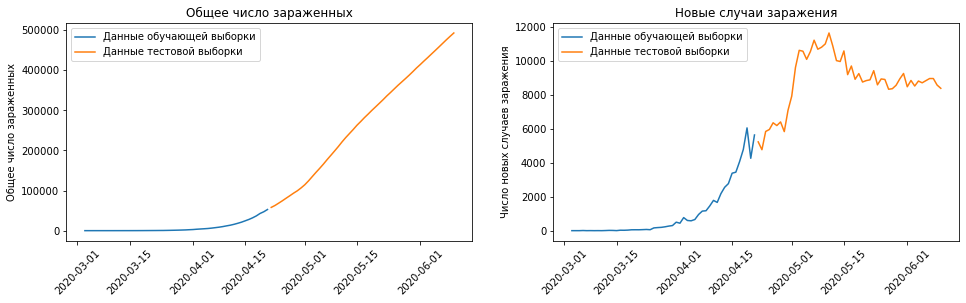

In [34]:
fig, axis = plt.subplots(1, 2, figsize=(16, 4))

axis[0].plot(df_train['date'], df_train['total_cases'], label='Данные обучающей выборки')
axis[0].plot(df_test['date'], df_test['total_cases'], label='Данные тестовой выборки')
axis[0].set_ylabel('Общее число зараженных')
axis[0].set_title('Общее число зараженных')
axis[0].legend()

axis[1].plot(df_train['date'], df_train['new_cases'], label='Данные обучающей выборки')
axis[1].plot(df_test['date'], df_test['new_cases'], label='Данные тестовой выборки')
axis[1].set_ylabel('Число новых случаев заражения')
axis[1].set_title('Новые случаи заражения')
axis[1].legend()

for ax in axis:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

In [37]:
x_train = np.arange(0, 50, 1)
x_test = np.arange(50, 100, 1)

y_train_total = df_train['total_cases'].values
y_test_total = df_test['total_cases'].values

y_train_new = df_train['new_cases'].values
y_test_new = df_test['new_cases'].values

class MyBayesianRegression():
    def __init__(self, init_mu, init_sigma):
        self.init_mu = init_mu
        self.init_sigma = init_sigma
    
    def fit(self, X, y):
        X = np.hstack((np.ones((len(X), 1)), X))
        
        W = np.linalg.inv(X.T @ X) @ X.T @ y
        y_pred = X @ W
        noise_var = (y - y_pred).var()
        alpha = 1 / noise_var
            
        self.sigma_ = np.linalg.inv(np.linalg.inv(self.init_sigma) + alpha * X.T @ X)
        self.mu_ = self.sigma_ @ (np.linalg.inv(self.init_sigma) @ self.init_mu + alpha * X.T @ y)
        
    def predict(self, X):
        X = np.hstack((np.ones((len(X), 1)), X))
        return X @ self.mu_
    
    def predict_samples(self, X, n_samples=200):
        X = np.hstack((np.ones((len(X), 1)), X))
        Ws = np.random.multivariate_normal(self.mu_, self.sigma_, n_samples)
        results = []
        for W in Ws:
            y = X @ W
            results.append(y)
            
        return np.array(results)

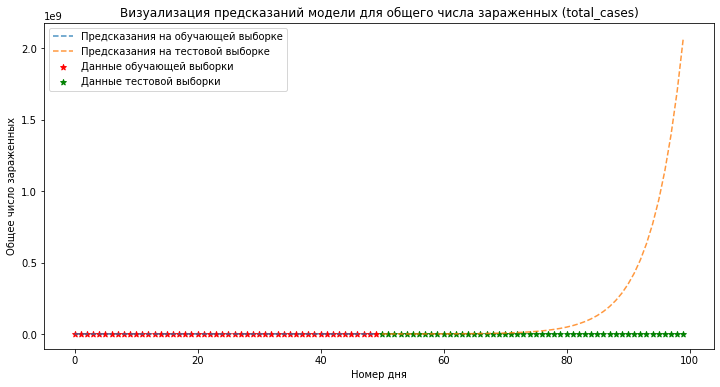

In [38]:
model_exp = MyBayesianRegression(
    init_mu=np.array([0, 0]),
    init_sigma=20*np.array([[1, 0], [0, 1]]),
)

lr_for_check = LinearRegression()

model_exp.fit(x_train.reshape(-1, 1), np.log(y_train_total))
lr_for_check.fit(x_train.reshape(-1, 1), np.log(y_train_total))

assert (model_exp.mu_[0] - lr_for_check.intercept_) < 0.001 
assert (model_exp.mu_[1] - lr_for_check.coef_[0]) < 0.001 
y_train_total_pred = np.exp(model_exp.predict(x_train.reshape(-1, 1)))
y_test_total_pred = np.exp(model_exp.predict(x_test.reshape(-1, 1)))

plt.figure(figsize=(12, 6))
plt.plot(x_train, y_train_total_pred, linestyle='--', alpha=0.8, label='Предсказания на обучающей выборке')
plt.scatter(x_train, y_train_total, label='Данные обучающей выборки', marker='*', color='red')
plt.plot(x_test, y_test_total_pred, linestyle='--', alpha=0.8, label='Предсказания на тестовой выборке')
plt.scatter(x_test, y_test_total, label='Данные тестовой выборки', marker='*', color='green')
plt.xlabel('Номер дня')
plt.ylabel('Общее число зараженных')
plt.title('Визуализация предсказаний модели для общего числа зараженных (total_cases)')
plt.legend();

##### b.

Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

Параметры модели: [1.81987921 0.19831688]


<ipython-input-39-966a6b77a659>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)


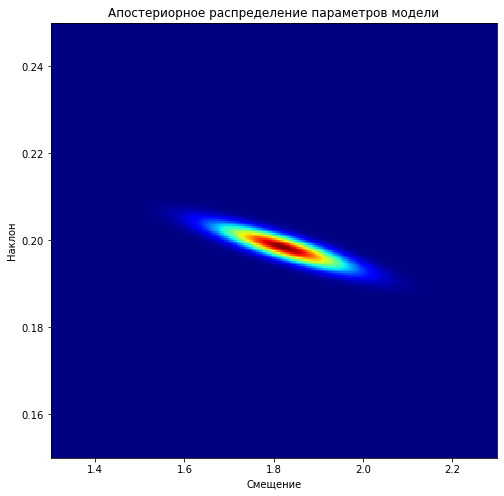

In [39]:
N = 250

plot_lims = (
    (1.3, 2.3),
    (0.15, 0.25)
)

X = np.linspace(*plot_lims[0], N)
Y = np.linspace(*plot_lims[1], N)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

print(f'Параметры модели: {model_exp.mu_}') 

Z = multivariate_normal.pdf(pos, mean=model_exp.mu_, cov=model_exp.sigma_)

plt.figure(figsize=(8, 8))
plt.xlim(plot_lims[0])
plt.ylim(plot_lims[1])
plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
plt.title('Апостериорное распределение параметров модели')
plt.xlabel('Смещение')
plt.ylabel('Наклон')
plt.show()

##### c.

Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

In [40]:
date_start = pd.to_datetime('2020-03-03')
date_may = pd.to_datetime('2020-05-01')
date_june = pd.to_datetime('2020-06-01')
date_sept = pd.to_datetime('2020-09-01')

x_may = np.array([[(date_may - date_start).days]])
x_june = np.array([[(date_june - date_start).days]])
x_sept = np.array([[(date_sept - date_start).days]])

y_may_total = int(np.exp(model_exp.predict(x_may)))
y_june_total = int(np.exp(model_exp.predict(x_june)))
y_sept_total = int(np.exp(model_exp.predict(x_sept)))

print(f'К 1 мая модель предсказывает всего {y_may_total} случаев')
print(f'К 1 июня модель предсказывает всего {y_june_total} случаев')
print(f'К 1 сентября модель предсказывает всего {y_sept_total} случаев')

К 1 мая модель предсказывает всего 744579 случаев
К 1 июня модель предсказывает всего 348238610 случаев
К 1 сентября модель предсказывает всего 29217711677929804 случаев


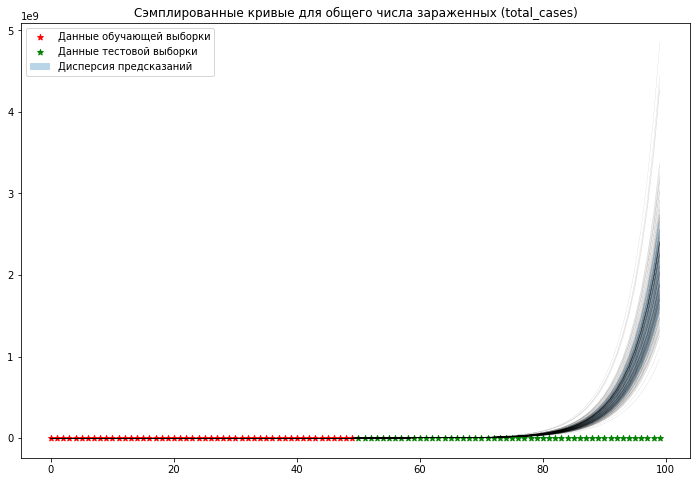

In [41]:
plt.figure(figsize=(12, 8))
x_sample = np.hstack((x_train, x_test))
y_samples = np.exp(model_exp.predict_samples(x_sample.reshape(-1, 1)))

for y_sample in y_samples:
    plt.plot(x_sample, y_sample, 'k-', lw=0.05)
    
lower_bound = np.mean(y_samples, axis=0) - np.std(y_samples, axis=0) 
upper_bound = np.mean(y_samples, axis=0) + np.std(y_samples, axis=0)
    
plt.scatter(x_train, y_train_total, label='Данные обучающей выборки', marker='*', color='red')
plt.scatter(x_test, y_test_total, label='Данные тестовой выборки', marker='*', color='green')
plt.fill_between(x_sample, lower_bound, upper_bound, alpha=0.3, label='Дисперсия предсказаний')


plt.title('Сэмплированные кривые для общего числа зараженных (total_cases)')
plt.legend();
plt.show()

C:\Users\gosIX\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gosIX\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


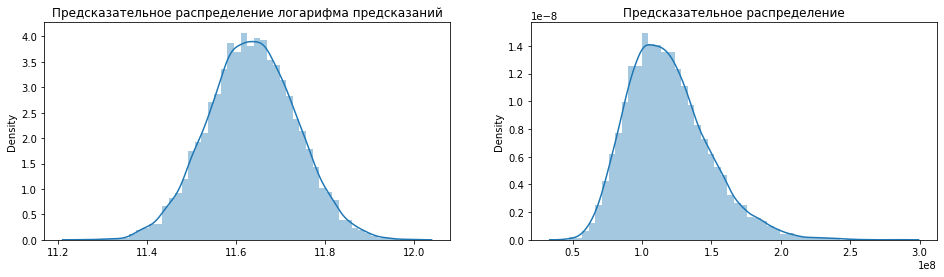

In [43]:
y_samples_log = model_exp.predict_samples(x_sample.reshape(-1, 1), n_samples=10000)
y_samples = np.exp(y_samples_log)

fig, axis = plt.subplots(1, 2, figsize=(16, 4))

sns.distplot(y_samples_log.mean(axis=1), ax=axis[0])
axis[0].set_title('Предсказательное распределение логарифма предсказаний')

sns.distplot(y_samples.mean(axis=1), ax=axis[1])
axis[1].set_title('Предсказательное распределение');

##### 3.

Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана:

Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.

##### a.

Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

Переменная total_cases - это, аккумулированная (можно условно сказать, проинтегрированная) переменная new_cases. Зная одну, мы можем легко узнать и другую. 

Поэтому, если мы моделируем total_cases функцией нормального распределения (проинтегрированная плотность распределения), то мы так же можем смоделировать переменную new_cases плотностью нормального распределения с теми же параметрами. И потом просто аккумулировать предсказания по new_cases, чтобы получить total_cases.

Для того, чтобы обучиться под плотность нормального распределения (экспоненту квадратичной функции) линейной регрессией, обучим полином 2 степени от логарифма таргета.

$y = e^{ax^2 + bx + c}$

$\ln{y} =ax^2 + bx + c$

##### b.

Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

Параметры модели: [-0.39492991  0.27548606 -0.00182747]

Пик пандемии в РФ, судя по модели, будет примерно 2020-05-17


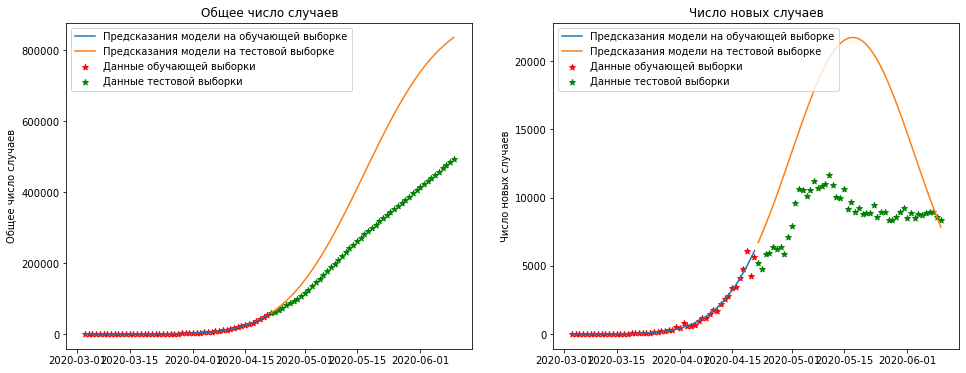

In [44]:
X_train = np.array([x_train, (x_train) ** 2]).T
X_test = np.array([x_test, (x_test) ** 2]).T

model_sigmoid = MyBayesianRegression(
    init_mu=np.array([0, 0, 0]),
    init_sigma=10*np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]),
)

model_sigmoid.fit(X_train, np.log(y_train_new))
print(f'Параметры модели: {model_sigmoid.mu_}\n')

c, b, a = model_sigmoid.mu_
mu_dist = -b/(2*a)
peak = pd.to_datetime('2020-03-03') + timedelta(days=np.round(mu_dist))
print(f'Пик пандемии в РФ, судя по модели, будет примерно {peak.strftime("%Y-%m-%d")}')


y_train_new_sigmoid = np.exp(model_sigmoid.predict(X_train))
y_test_new_sigmoid = np.exp(model_sigmoid.predict(X_test))

y_train_total_sigmoid = y_train_new_sigmoid.cumsum()
y_test_total_sigmoid = y_train_total_sigmoid.max() + y_test_new_sigmoid.cumsum()

train_dates = [pd.to_datetime('2020-03-03') + timedelta(days=i) for i in range(len(x_train))]
test_dates = [pd.to_datetime('2020-03-03') + timedelta(days=(i + len(x_train))) for i in range(len(x_test))]

fig, axis = plt.subplots(1, 2, figsize=(16, 6))

axis[0].scatter(train_dates, y_train_total, label='Данные обучающей выборки', marker='*', color='red')
axis[0].scatter(test_dates, y_test_total, label='Данные тестовой выборки', marker='*', color='green')
axis[0].plot(train_dates, y_train_total_sigmoid, label='Предсказания модели на обучающей выборке')
axis[0].plot(test_dates, y_test_total_sigmoid, label='Предсказания модели на тестовой выборке')
axis[0].set_ylabel('Общее число случаев')
axis[0].set_title('Общее число случаев')
axis[0].legend()


axis[1].scatter(train_dates, y_train_new, label='Данные обучающей выборки', marker='*', color='red')
axis[1].scatter(test_dates, y_test_new, label='Данные тестовой выборки', marker='*', color='green')
axis[1].plot(train_dates, y_train_new_sigmoid, label='Предсказания модели на обучающей выборке')
axis[1].plot(test_dates, y_test_new_sigmoid, label='Предсказания модели на тестовой выборке')
axis[1].set_ylabel('Число новых случаев')
axis[1].set_title('Число новых случаев')
axis[1].legend()

plt.show();

##### c.

Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?


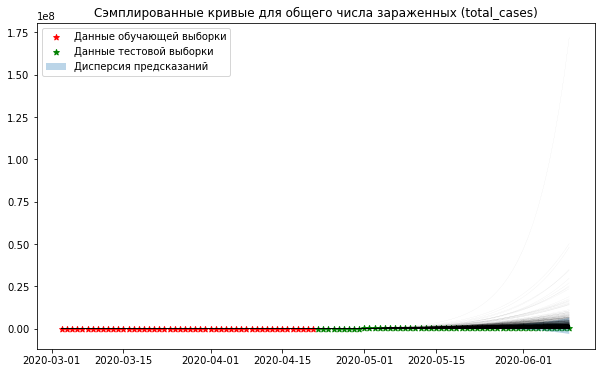

In [45]:
plt.figure(figsize=(10, 6))
X_sample = np.vstack((X_train, X_test))
y_samples = np.exp(model_sigmoid.predict_samples(X_sample, n_samples=2000)).cumsum(axis=1)

for y_sample in y_samples:
    plt.plot(np.hstack((train_dates, test_dates)), y_sample, 'k-', lw=0.02)
    
lower_bound = np.mean(y_samples, axis=0) - np.std(y_samples, axis=0) 
upper_bound = np.mean(y_samples, axis=0) + np.std(y_samples, axis=0)
    
plt.scatter(train_dates, y_train_total, label='Данные обучающей выборки', marker='*', color='red')
plt.scatter(test_dates, y_test_total, label='Данные тестовой выборки', marker='*', color='green')
plt.fill_between(np.hstack((train_dates, test_dates)), lower_bound, upper_bound, alpha=0.3, label='Дисперсия предсказаний')

plt.title('Сэмплированные кривые для общего числа зараженных (total_cases)')
plt.legend();
plt.show()

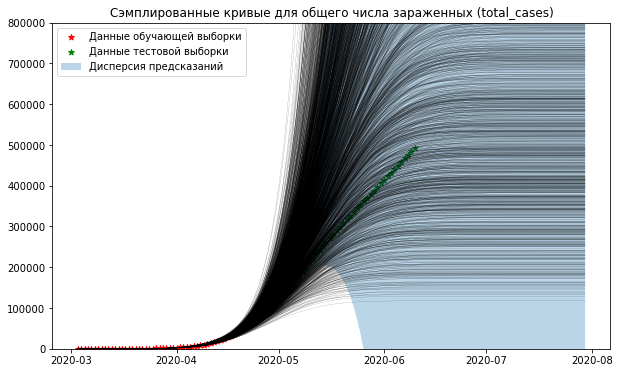

In [46]:
plt.figure(figsize=(10, 6))
y_samples = np.exp(model_sigmoid.predict_samples(X_future, n_samples=2000)).cumsum(axis=1)

for y_sample in y_samples:
    plt.plot(future_dates, y_sample, 'k-', lw=0.1)
    
lower_bound = np.mean(y_samples, axis=0) - np.std(y_samples, axis=0) 
upper_bound = np.mean(y_samples, axis=0) + np.std(y_samples, axis=0)

    
plt.scatter(train_dates, y_train_total, label='Данные обучающей выборки', marker='*', color='red')
plt.scatter(test_dates, y_test_total, label='Данные тестовой выборки', marker='*', color='green')
plt.fill_between(future_dates, lower_bound, upper_bound, alpha=0.3, label='Дисперсия предсказаний')
plt.ylim((0, 800_000))
plt.title('Сэмплированные кривые для общего числа зараженных (total_cases)')
plt.legend();
plt.show()

C:\Users\gosIX\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


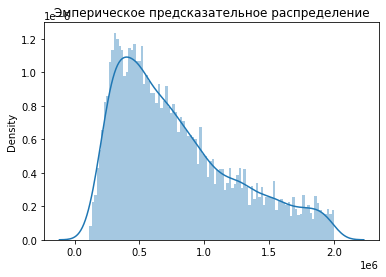

In [47]:
y_samples = np.exp(model_sigmoid.predict_samples(X_future, n_samples=10000)).cumsum(axis=1)[:, -1]
sns.distplot(y_samples[y_samples < 2000000], bins=100)
plt.title('Эмперическое предсказательное распределение');

In [48]:
print(f'Прогноз числа случаев в случае оптимистичного сценария (10-й процентиль). Случаев: {np.percentile(y_samples, 10):.0f}')
print(f'Прогноз числа случаев в случае пессимистичного сценария (90-й процентиль). Случаев: {np.percentile(y_samples, 90):.0f}')

Прогноз числа случаев в случае оптимистичного сценария (10-й процентиль). Случаев: 316141
Прогноз числа случаев в случае пессимистичного сценария (90-й процентиль). Случаев: 5323803
